In [1]:
from statistics import mean
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [17]:
actual = pd.read_csv("/Users/mz195/BTC_price_db.csv")
arima = pd.read_csv("/Users/mz195/arima_predictions.csv")
varmax = pd.read_csv("/Users/mz195/varmax_predictions.csv")
ses = pd.read_csv("/Users/mz195/ses_predictions.csv")
rf = pd.read_csv("/Users/mz195/random_forest_predictions.csv")
overall = pd.read_csv("/Users/mz195/overall_predictions.csv")

In [18]:
print("Actual:\t{}".format(actual.shape))
print("ARIMA:\t{}".format(arima.shape))
print("VARMAX:\t{}".format(varmax.shape))
print("SES:\t{}".format(ses.shape))
print("Random Forest:\t{}".format(rf.shape))
print("Overall:\t{}".format(overall.shape))

Actual:	(2880, 2)
ARIMA:	(2880, 2)
VARMAX:	(2880, 2)
SES:	(2880, 2)
Random Forest:	(2880, 2)
Overall:	(2880, 2)


In [19]:
arima_df = actual.merge(arima, on='time_')
arima_varmax_df = arima_df.merge(varmax, on='time_')
arima_varmax_ses_df = arima_varmax_df.merge(ses, on='time_')
arima_varmax_ses_rf_df = arima_varmax_ses_df.merge(rf, on='time_')
all_models_df = arima_varmax_ses_rf_df.merge(overall, on='time_')
all_models_df.shape

(2880, 7)

In [20]:
all_models_df.head()

,time_,price_avg,arima,varmax,ses,rf,overall
0,2021-07-11 00:00:00,33333.194467,33334.711115,33330.268477,33330.076948,33880.874283,33868.514171
1,2021-07-11 00:00:30,33331.410000,33335.702985,33332.916393,33332.050169,33322.369717,33327.900025
2,2021-07-11 00:01:00,33331.279267,33335.825017,33332.698842,33333.142375,33324.023807,33329.760299
3,2021-07-11 00:01:30,33315.438867,33333.958310,33330.019033,33333.991187,33324.698066,33328.542030
4,2021-07-11 00:02:00,33314.253750,33323.917070,33320.872194,33329.434542,33323.495371,33327.251317


In [24]:
all_models_df = all_models_df[120:]

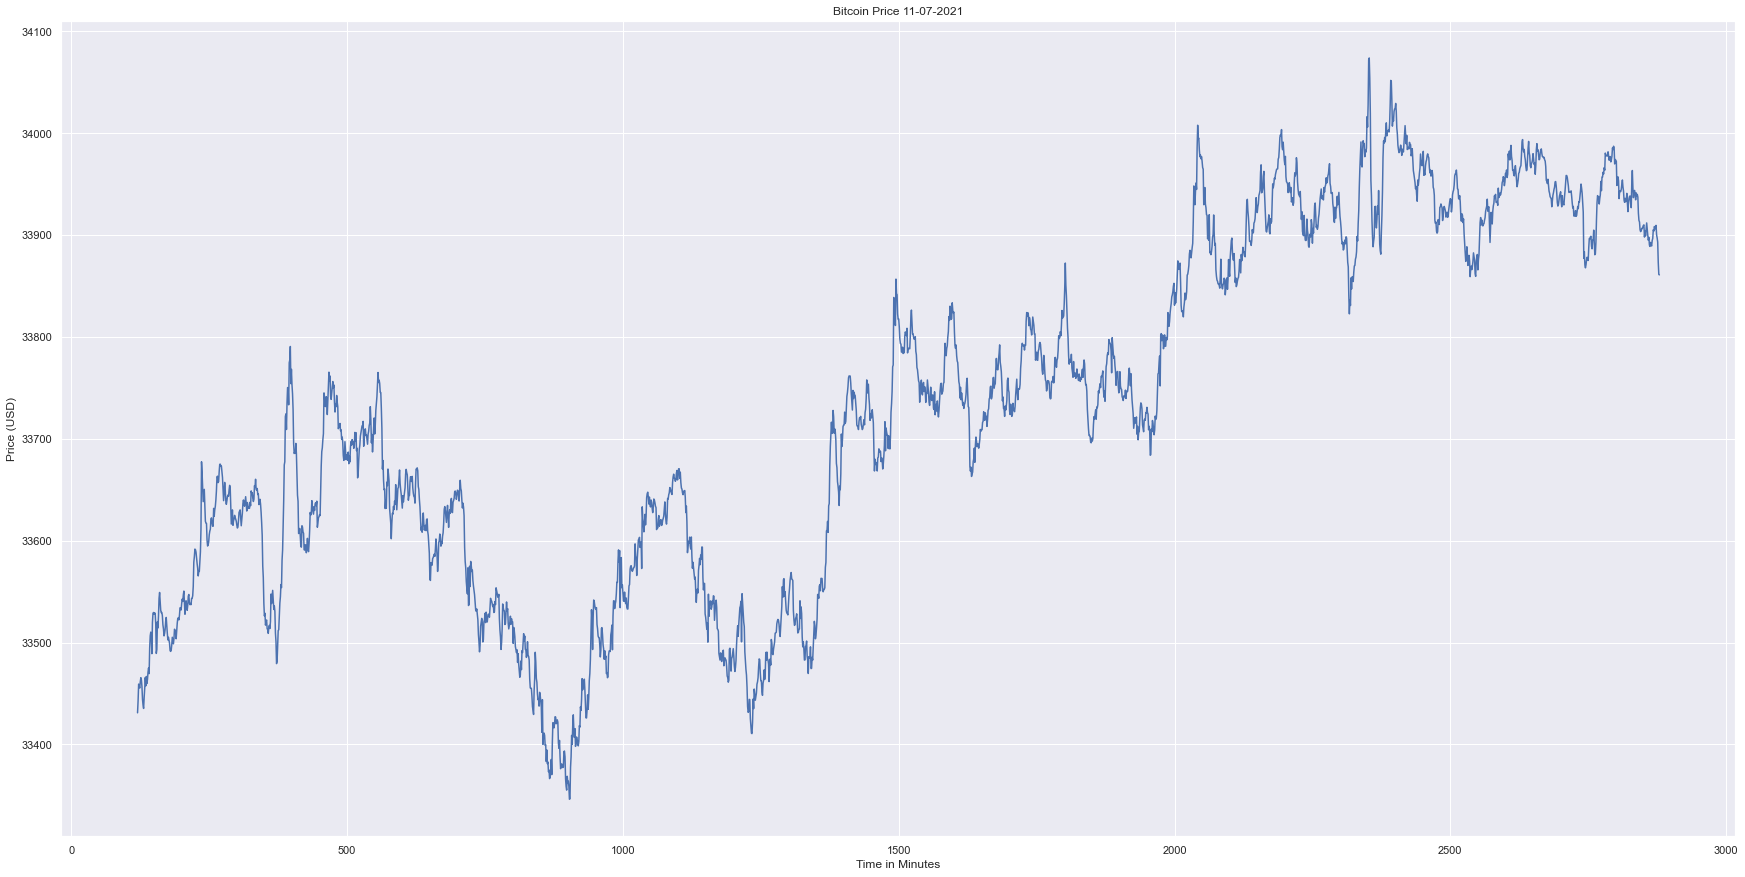

In [42]:
# plot forecasts against actual outcomes
plt.figure(figsize=(30,15))
plt.plot(all_models_df["price_avg"])
plt.xlabel("Time in Minutes")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price 11-07-2021")
# plt.plot(all_models_df["arima"], color='r')
# plt.plot(all_models_df["varmax"], color='g')
# plt.plot(all_models_df["ses"], color='m')
# plt.plot(all_models_df["rf"], color='y')
# plt.plot(all_models_df["overall"], color='b')
plt.savefig('BTC_Price_11-07-2021.png')